In [69]:
import pandas as pd

customer_data = pd.read_csv('CustomerData.csv')
order_data= pd.read_csv('OrderData.csv')
main_table = pd.read_csv('MainTable.csv')
product_data = pd.read_csv('ProductData.csv')
store_data = pd.read_csv('StoreData.csv')

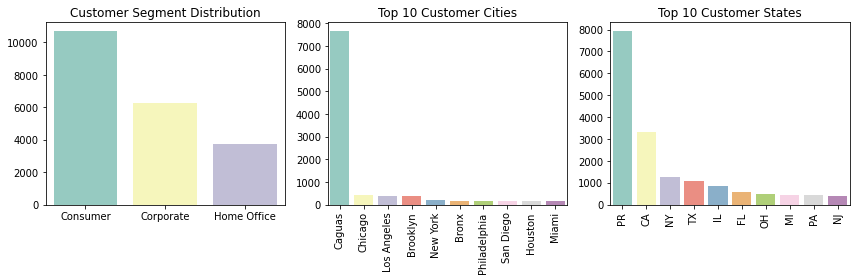

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting relevant columns from customer_data
customer_segment_counts = customer_data['Customer_Segment'].value_counts()
customer_city_counts = customer_data['Customer_City'].value_counts()
customer_state_counts = customer_data['Customer_State'].value_counts()

#  personalized marketing campaign visualizations
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')

plt.subplot(132)
sns.barplot(x=customer_city_counts[:10].index, y=customer_city_counts[:10].values)
plt.xticks(rotation=90)
plt.title('Top 10 Customer Cities')

plt.subplot(133)
sns.barplot(x=customer_state_counts[:10].index, y=customer_state_counts[:10].values)
plt.xticks(rotation=90)
plt.title('Top 10 Customer States')
b
plt.tight_layout()
plt.show()


ValueError: Unknown format code 'd' for object of type 'str'

<Figure size 1728x576 with 0 Axes>

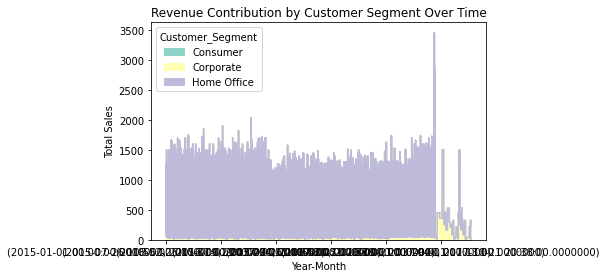

In [80]:

# Assuming 'order_date_DateOrders' is in datetime format
order_data['Year'] = order_data['order_date_DateOrders']
order_data['Month'] = order_data['order_date_DateOrders']

# Merge 'order_data' with 'customer_data' on 'Order_Customer_Id' to get customer segment information
merged_data = pd.merge(order_data, customer_data[['Customer_Id', 'Customer_Segment']], left_on='Order_Customer_Id', right_on='Customer_Id', how='inner')

# Group by Year, Month, and Customer Segment and sum the sales
sales_by_segment_and_time = merged_data.groupby(['Year', 'Month', 'Customer_Segment'])['Sales'].sum().reset_index()

# Pivot the data to have Customer Segments as columns and Year-Month as the index
pivot_sales_data = sales_by_segment_and_time.pivot_table(index=['Year', 'Month'], columns='Customer_Segment', values='Sales', fill_value=0)

# Create a wider stacked area plot
plt.figure(figsize=(24, 8))  # Double the width of the chart
sns.set_palette("Set3")  # You can choose your preferred color palette
ax = pivot_sales_data.plot(kind='area', stacked=True)

plt.title('Revenue Contribution by Customer Segment Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')

# Reduce the frequency of x-axis labels and rotate them
x_labels = [f"{y}-{m:02d}" for y, m in pivot_sales_data.index]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45)  # Rotate labels by 45 degrees for better readability

# Move the legend outside the chart
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Ensure all labels are visible
plt.show()


<Figure size 864x432 with 0 Axes>

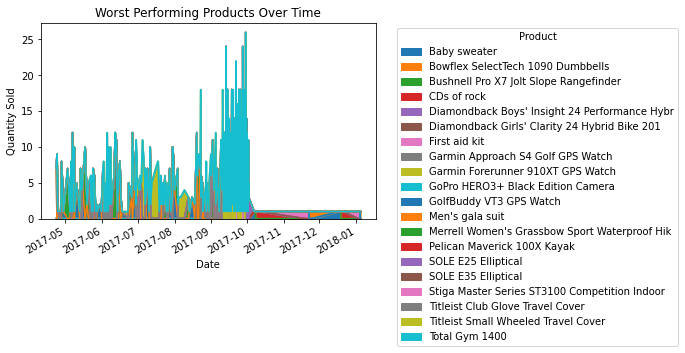

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

customer_data = pd.read_csv('CustomerData.csv')
order_data= pd.read_csv('OrderData.csv')
main_table = pd.read_csv('MainTable.csv')
product_data = pd.read_csv('ProductData.csv')
store_data = pd.read_csv('StoreData.csv')



order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'])

# Merge the relevant dataframes to get product information
merged_data = pd.merge(order_data, main_table, on='Order_Id')
merged_data = pd.merge(merged_data, product_data, on='Product_Card_Id')

# Group and aggregate data by product and quantity sold
product_performance = merged_data.groupby(['Product_Name'])['Order_Item_Quantity'].sum()

# Determine the top 5-10 worst-performing products
worst_products = product_performance.nsmallest(20)

# Filter the merged_data to include only data for the worst products
worst_data = merged_data[merged_data['Product_Name'].isin(worst_products.index)]

# Group and aggregate data by date and product for the worst products
worst_product_performance = worst_data.groupby(['order_date_DateOrders', 'Product_Name'])['Order_Item_Quantity'].sum().unstack(fill_value=0)

# Create a stacked area plot for the worst products
plt.figure(figsize=(12, 6))
ax = worst_product_performance.plot.area(stacked=True)
plt.title('Worst Performing Products Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Move the legend outside the chart
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



Tracking these products prices over time

<Figure size 864x432 with 0 Axes>

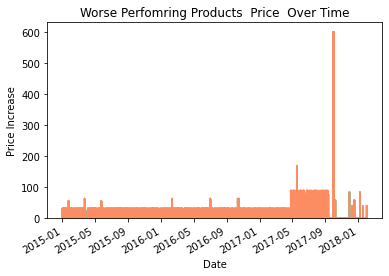

In [36]:

# Assuming you have a date column in the order_data dataframe
order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'])

# Merge the relevant dataframes to get product information
merged_data = pd.merge(order_data, main_table, on='Order_Id')
merged_data = pd.merge(merged_data, product_data, on='Product_Card_Id')

# Group and aggregate data by date and product for average product price
product_prices = merged_data.groupby(['order_date_DateOrders', 'Product_Name'])['Product_Price'].mean().unstack(fill_value=0)

# Calculate the price change for each product over time
price_change = product_prices.diff()

# Identify the top 10 products with the highest price increase
top_10_increasing_products = price_change.iloc[-1].nlargest(10).index

# Select data for the top 10 increasing products
top_10_price_change = price_change[top_10_increasing_products]

# Create a stacked area plot to visualize price increase
plt.figure(figsize=(12, 6))
top_10_price_change[top_10_price_change > 0].plot.area(stacked=True)
plt.title('Worse Perfomring Products  Price  Over Time')
plt.xlabel('Date')
plt.ylabel('Price Increase')
plt.legend(title='Product')
plt.legend().set_visible(False)

Best Perfomring Products

<Figure size 864x432 with 0 Axes>

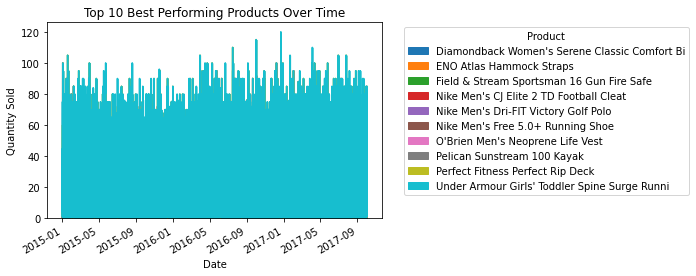

In [29]:

order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'])

# Merge the relevant dataframes to get product information
merged_data = pd.merge(order_data, main_table, on='Order_Id')
merged_data = pd.merge(merged_data, product_data, on='Product_Card_Id')

# Group and aggregate data by product and quantity sold
product_performance = merged_data.groupby(['Product_Name'])['Order_Item_Quantity'].sum()

# Determine the top 10 best-performing products
best_products = product_performance.nlargest(10)

# Filter the merged_data to include only data for the best products
best_data = merged_data[merged_data['Product_Name'].isin(best_products.index)]

# Group and aggregate data by date and product for the best products
best_product_performance = best_data.groupby(['order_date_DateOrders', 'Product_Name'])['Order_Item_Quantity'].sum().unstack(fill_value=0)

# Create a stacked area plot for the best products
plt.figure(figsize=(12, 6))
ax = best_product_performance.plot.area(stacked=True)
plt.title('Top 10 Best Performing Products Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Move the legend outside the chart
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Tacking Price changes


<Figure size 864x432 with 0 Axes>

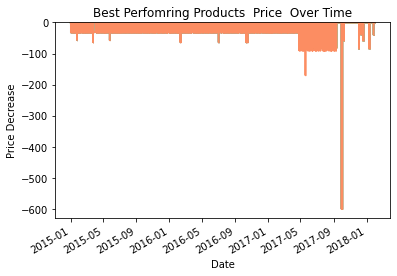

In [37]:

# Create a separate stacked area plot to visualize price decrease
plt.figure(figsize=(12, 6))
top_10_price_change[top_10_price_change < 0].plot.area(stacked=True)
plt.title('Best Perfomring Products  Price  Over Time')
plt.xlabel('Date')
plt.ylabel('Price Decrease')
plt.legend(title='Product')
plt.legend().set_visible(False)

plt.show()

<Figure size 1728x576 with 0 Axes>

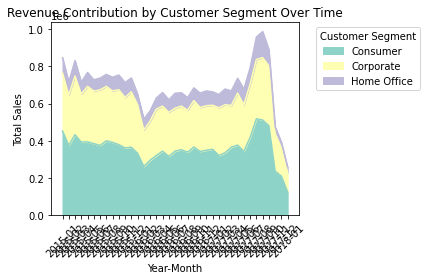

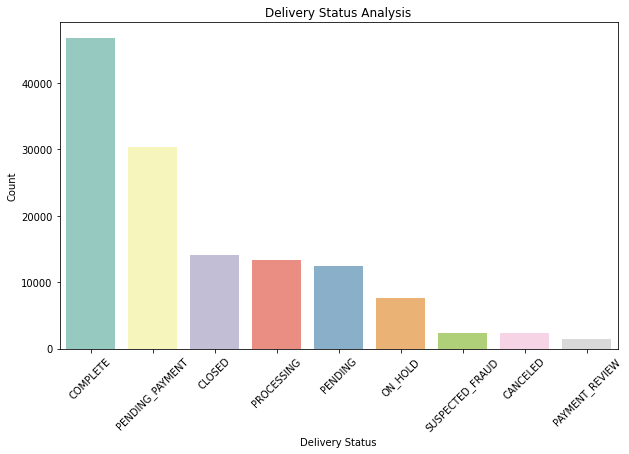

In [74]:
import seaborn as sns

# Calculate the frequency of each delivery status
delivery_status_counts = order_data['Order_Status'].value_counts()

#/ bar chart for delivery status analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=delivery_status_counts.index, y=delivery_status_counts.values)
plt.title('Delivery Status Analysis')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


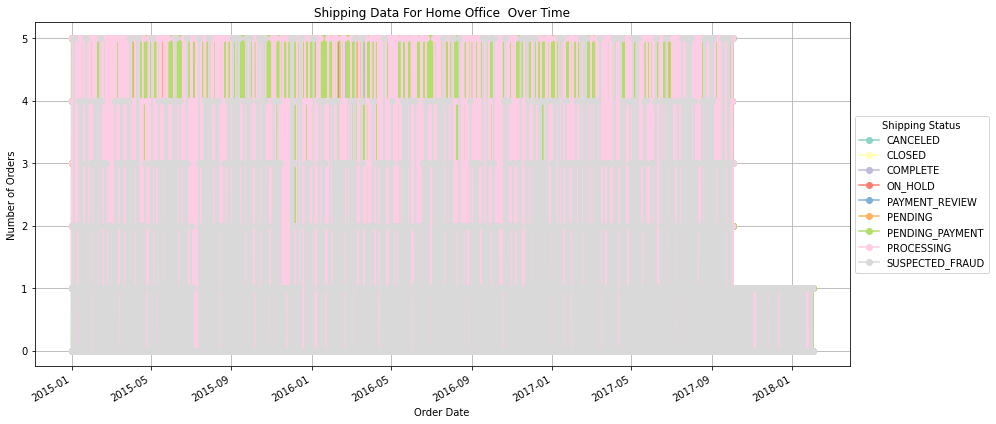

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 'order_data' dataframe (if not loaded already)
order_data = pd.read_csv('OrderData.csv')

# Convert 'order_date_DateOrders' column to datetime
order_data['order_date_DateOrders'] = pd.to_datetime(order_data['order_date_DateOrders'])

# Group data by order date and order status
shipping_trend = order_data.groupby(['order_date_DateOrders', 'Order_Status']).size().unstack(fill_value=0)

# Plot the shipping trend over time
plt.figure(figsize=(12, 6))
ax = shipping_trend.plot(kind='line', marker='o', linestyle='-', ax=plt.gca())
plt.title('Shipping Data For Home Office  Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()

# Move the legend outside the chart
ax.legend(title='Shipping Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
